In [4]:
#Business Objective:
#This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy). The goal here is to model the probability that a business goes bankrupt from different features.

In [1]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn import tree
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier as KNC
import math
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pickle

In [8]:
bankrupt = pd.read_csv("C:/Users/joyel/Desktop/Bankruptcy_Prevention_Project/DataSet/bankruptcy-prevention.csv", sep = ';', header = 0)
bankrupt

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [9]:
bankrupt.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
bankrupt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [11]:
bankrupt.shape

(250, 7)

In [12]:
#Checking is there any missing values are there in data or not

In [13]:
bankrupt.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [14]:
#Checking for duplicate values

In [15]:
bankrupt[bankrupt.duplicated()]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
11,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
13,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
15,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
16,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
18,0.5,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [16]:
bankrupt=bankrupt.drop_duplicates()
bankrupt.shape

(103, 7)

In [17]:
bankrupt_new = bankrupt.iloc[:,:]
bankrupt_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy
187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy
190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy
192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy


In [18]:
bankrupt_new["class_yn"] = 1
bankrupt_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,1
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,1
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,1
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
...,...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy,1
187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy,1
190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy,1
192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy,1


In [19]:
#Here we are changing the target variable to bankruptcy = 0, non-bankruptcy = 1
bankrupt_new.loc[bankrupt[' class'] == 'bankruptcy', 'class_yn'] = 0
bankrupt_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,0
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,0
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,0
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
...,...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy,1
187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy,1
190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy,1
192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy,1


In [20]:
bankrupt_new.drop(' class', inplace = True, axis =1)
bankrupt_new.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [21]:
#Exploratory Data Analysis (EDA)

In [22]:
bankrupt_new.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
industrial_risk,1.000000,0.225742,-0.074246,0.056011,-0.208575,0.152581,-0.217132
management_risk,0.225742,1.000000,-0.163226,-0.112473,-0.125335,0.089500,-0.188887
financial_flexibility,-0.074246,-0.163226,1.000000,0.397757,0.525996,-0.000401,0.624573
credibility,0.056011,-0.112473,0.397757,1.000000,0.524773,-0.110603,0.606350
competitiveness,-0.208575,-0.125335,0.525996,0.524773,1.000000,-0.052165,0.859809
operating_risk,0.152581,0.089500,-0.000401,-0.110603,-0.052165,1.000000,-0.136393
class_yn,-0.217132,-0.188887,0.624573,0.606350,0.859809,-0.136393,1.000000


<Axes: >

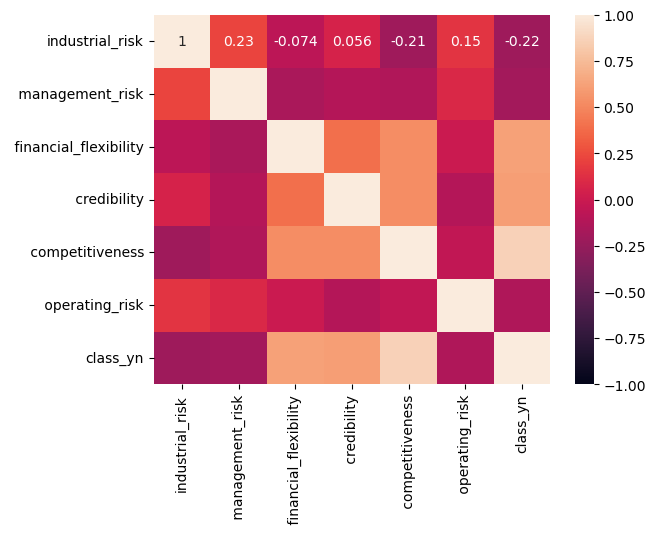

In [23]:
sns.heatmap(bankrupt_new.corr(), vmin = -1, vmax = 1, annot = True)

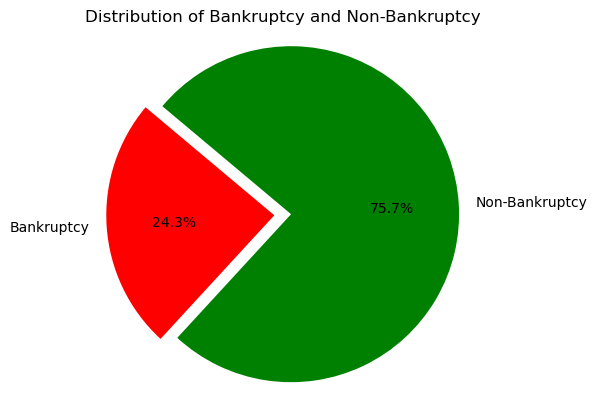

In [24]:
#Count the number of bankruptcy and non-bankruptcy instances
bankruptcy_count = bankrupt_new[bankrupt_new['class_yn'] == 0]['class_yn'].count()
non_bankruptcy_count = bankrupt_new[bankrupt_new['class_yn'] == 1]['class_yn'].count()

#Create a pie chart
labels = ['Bankruptcy', 'Non-Bankruptcy']
sizes = [bankruptcy_count, non_bankruptcy_count]
colors = ['red', 'green']  # You can choose different colors
explode = (0.1, 0)  # Explode a slice (i.e., 'bankruptcy') to highlight it

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#Display the pie chart
plt.title("Distribution of Bankruptcy and Non-Bankruptcy")
plt.show()

In [25]:
#Non bankruptcy:Bankruptcy = 75: 25 => 3:1

<Axes: xlabel='class_yn', ylabel='count'>

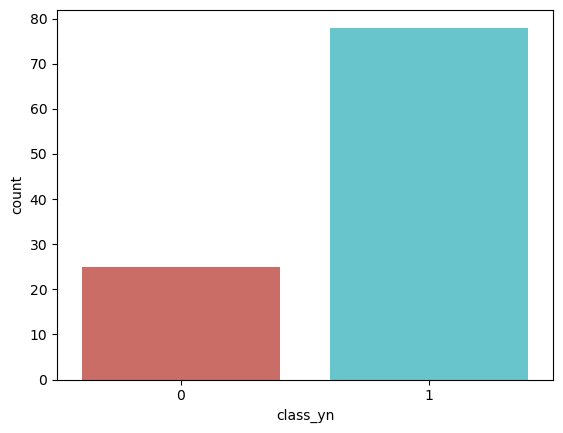

In [26]:
sns.countplot(x = 'class_yn', data = bankrupt_new, palette = 'hls')

<Axes: xlabel=' financial_flexibility', ylabel='count'>

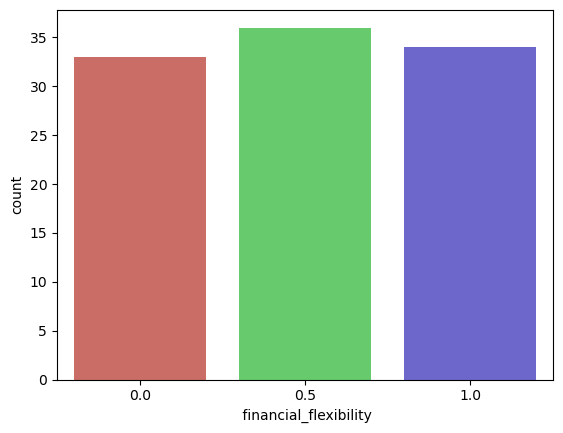

In [29]:
sns.countplot(x = ' financial_flexibility', data = bankrupt_new, palette = 'hls')

In [30]:
bankrupt_new.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', 'class_yn'],
      dtype='object')

<Axes: xlabel=' financial_flexibility'>

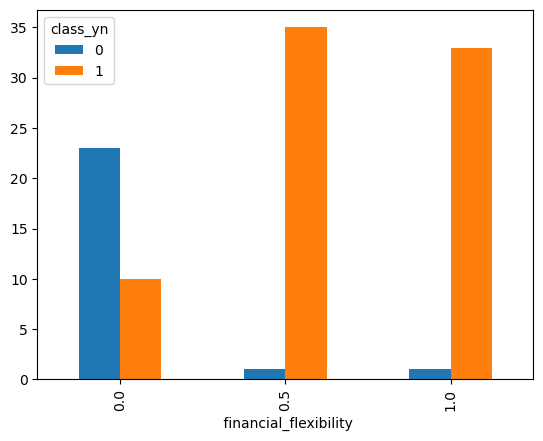

In [31]:
pd.crosstab(bankrupt_new[' financial_flexibility'], bankrupt_new['class_yn']).plot(kind = 'bar')

<Axes: xlabel=' credibility'>

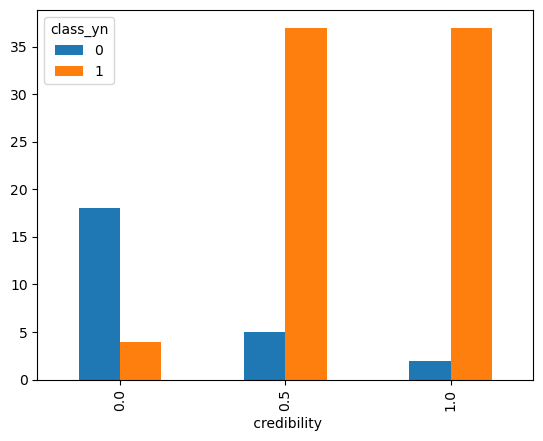

In [32]:
pd.crosstab(bankrupt_new[' credibility'], bankrupt_new.class_yn).plot(kind = 'bar')

<Axes: xlabel=' operating_risk'>

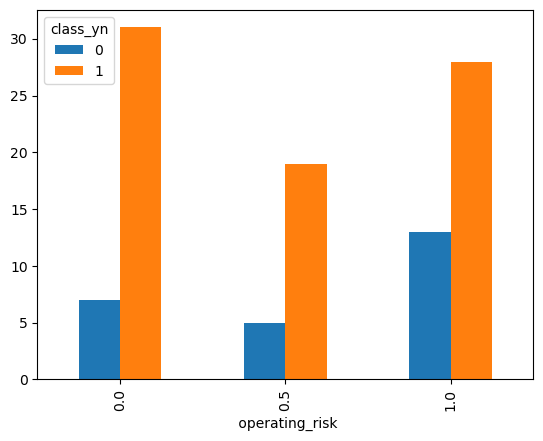

In [33]:
pd.crosstab(bankrupt_new[' operating_risk'], bankrupt_new.class_yn).plot(kind='bar')

<Axes: xlabel=' financial_flexibility'>

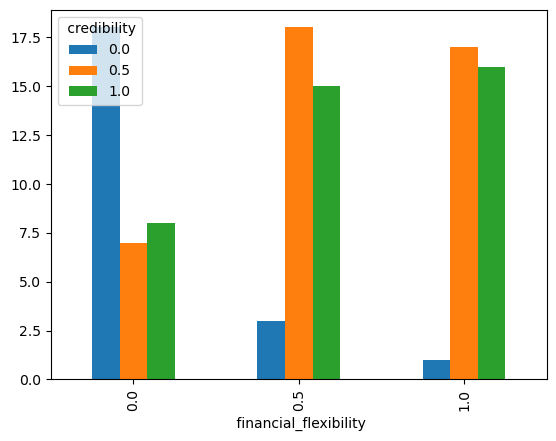

In [34]:
pd.crosstab(bankrupt_new[' financial_flexibility'], bankrupt_new[' credibility']).plot(kind = 'bar')

In [36]:
#Banktruptcy is more when industrial risk in the business is high
#Bankruptcy is more when management risk in the business is high
#Bankruptcy is more when operating risk in the business is high
#Bankruptcy is more when financial flexibility of the business is low
#Bankruptcy is more when credibility in the business is low
#Bankruptcy is more when competitiveness in the business is low

In [37]:
#Preparing Models

In [38]:
#Input
x = bankrupt_new.iloc[:,:-1]

#Target variable
y = bankrupt_new.iloc[:,-1]

In [39]:
#Sliptting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.8, random_state = 0)

# 1.Logistic Regression

In [40]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
accuracy_score(y_pred,y_test)*100

80.72289156626506

In [41]:
cnf_matrix=confusion_matrix(y_test,y_pred)
cnf_matrix

array([[ 6, 16],
       [ 0, 61]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

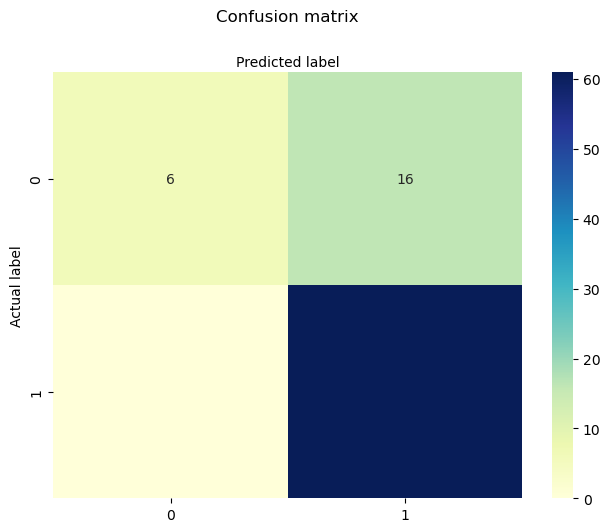

In [42]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.27      0.43        22
           1       0.79      1.00      0.88        61

    accuracy                           0.81        83
   macro avg       0.90      0.64      0.66        83
weighted avg       0.85      0.81      0.76        83



# 2. Decision Tree

In [44]:
clf = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)

In [45]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

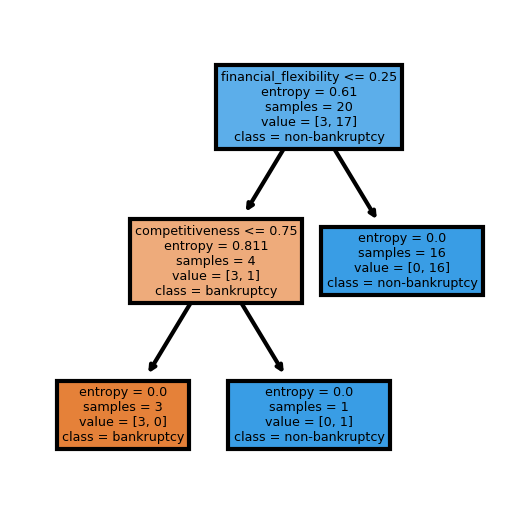

In [46]:
fn=['industrial_risk','management_risk','financial_flexibility','credibility','competitiveness','operating_risk']
cn=['bankruptcy', 'non-bankruptcy']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [47]:
y_pred=clf.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [48]:
accuracy_score(y_test,y_pred)*100

96.3855421686747

# 3. Random Forest

In [49]:
ran_forest=RandomForestClassifier(n_estimators=50,max_features=3)
ran_forest.fit(x_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=50)

In [50]:
y_pred=ran_forest.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [51]:
accuracy_score(y_test,y_pred)*100

97.59036144578313

# 4. Boosting

In [52]:
#4.1 Adaboost

In [53]:
adaboost=AdaBoostClassifier(n_estimators=50,random_state=7)
adaboost.fit(x_train,y_train)

AdaBoostClassifier(random_state=7)

In [54]:
y_pred=adaboost.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [55]:
accuracy_score(y_test,y_pred)*100

96.3855421686747

In [56]:
#4.2 XGBoost

In [57]:
xgmodel = XGBClassifier()
xgmodel.fit(x_train, y_train)
y_pred = xgmodel.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.49%


In [58]:
#4.3 LGBM

In [59]:
# Defining Parameters
d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 5
params['min_data'] = 50
params['max_depth'] = 4

In [60]:
lgmodel = lgb.train(params, d_train, 50)
y_pred=lgmodel.predict(x_test)
predictions = [round(value) for value in y_pred]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 17, number of negative: 3
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 20, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.850000 -> initscore=1.734601
[LightGBM] [Info] Start training from score 1.734601
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves tha

In [61]:
accuracy_score(y_test, predictions)*100

73.49397590361446

# 5.KNN

In [62]:
knn = KNeighborsClassifier()

In [63]:
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [64]:
accuracy_score(y_test,y_pred)*100

90.36144578313254

# 6.SVM

In [65]:
# Hyperparameter Tuning
svm = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(svm,param_grid,cv=10)
gsv.fit(x_train,y_train)
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}, 0.95)

In [66]:
svm= SVC(C= 15, gamma = 0.5,kernel='rbf')
svm.fit(x_train , y_train)
y_pred4 = svm.predict(x_test)
accuracy_score(y_test, y_pred) * 100

90.36144578313254

In [67]:
#From the above models we can see that Random Forest is giving better accuracy.